In [5]:
import matplotlib, sys,  os
import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from tqdm import tqdm

import healpy as hp
import sys
import os
sys.path.append("../../../")
import mylib as my

  0%|          | 0/767 [00:00<?, ?it/s]

100%|██████████| 767/767 [00:26<00:00, 28.81it/s]


0 360 -20 80


setting the output map dtype to [dtype('float64')]


<Figure size 1920x1440 with 0 Axes>

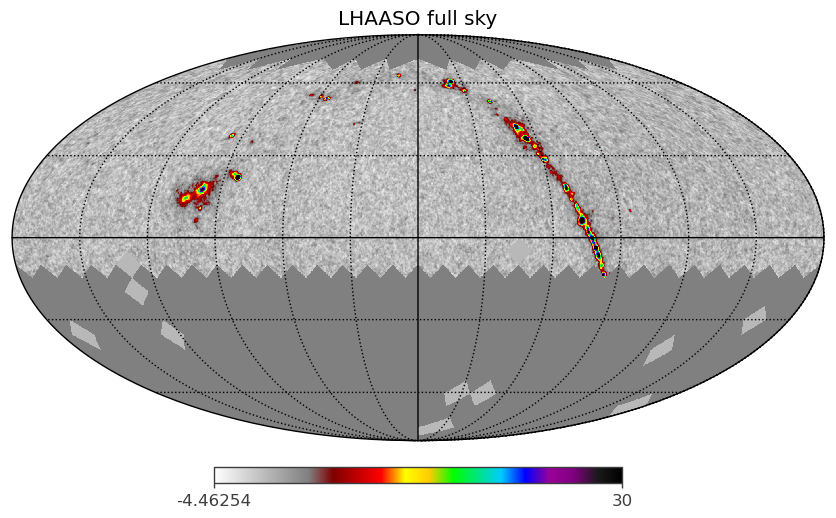

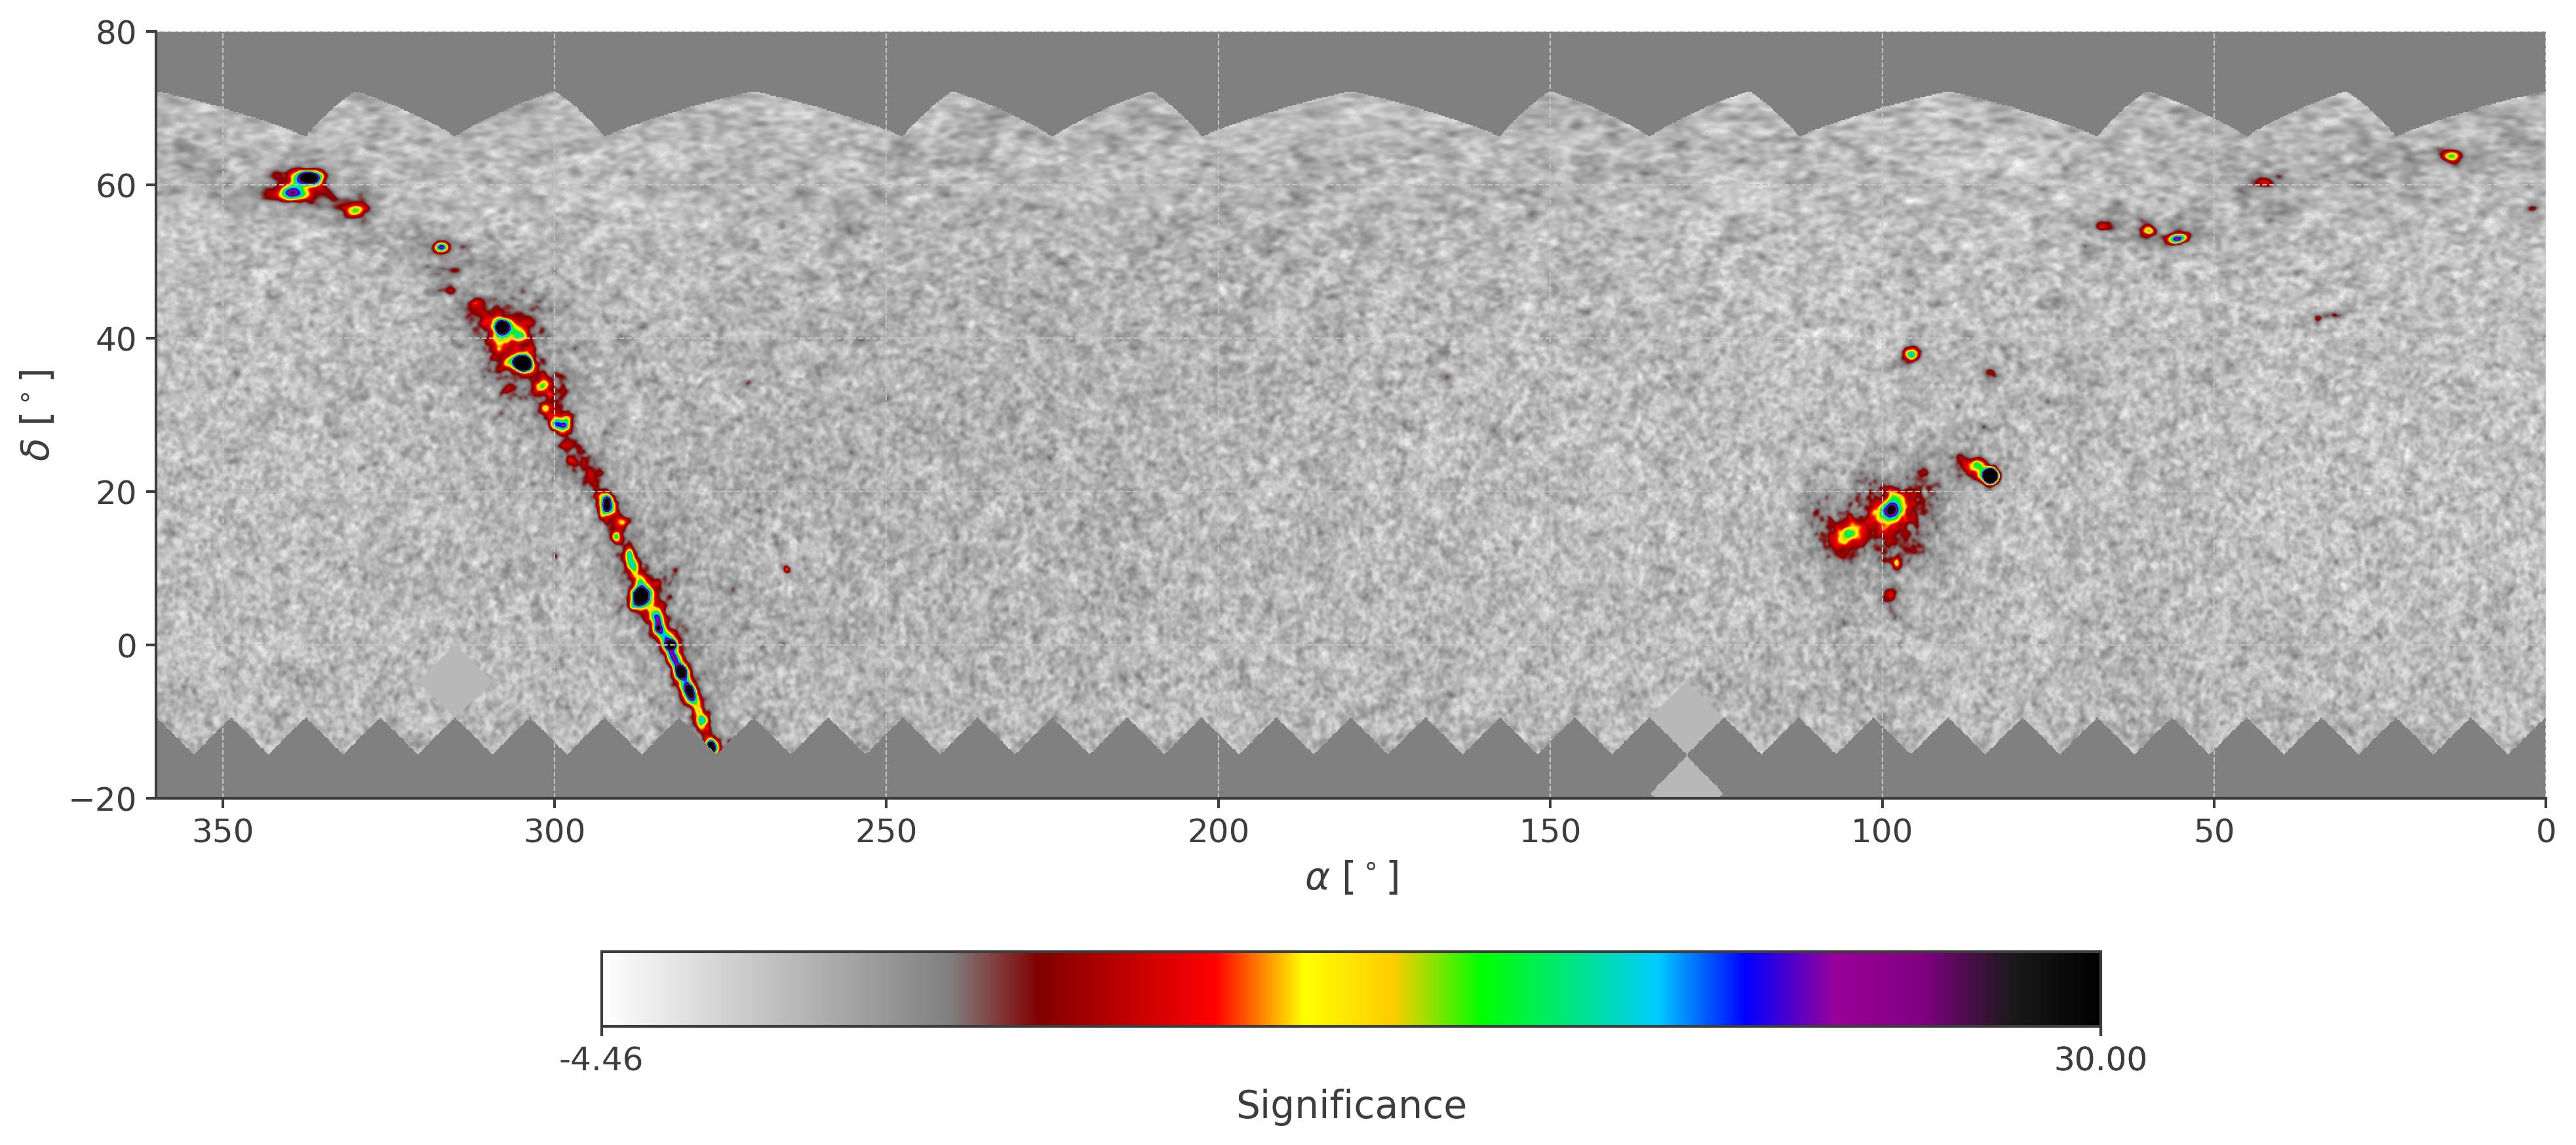

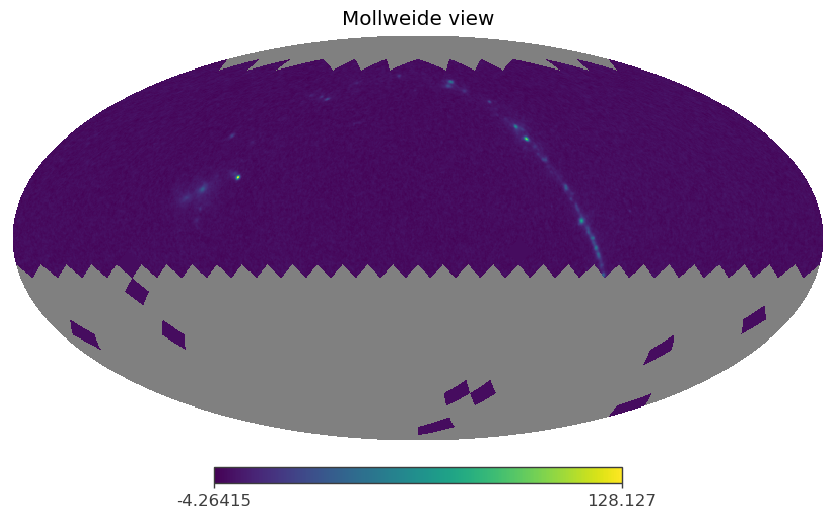

In [6]:
nside=1024
npix=hp.nside2npix(nside)
skymap=np.zeros(npix)
for i in tqdm(range(767)):
    try:
        data=np.loadtxt(f"sig_no{i}.txt")
    except:
        continue
    for j in range(len(data)):
        skymap[int(data[j][0])]=float(data[j][1])
skymap=hp.ma(skymap)
%matplotlib inline
savename="KM2A_llh-3.5"
my.hpDraw("region_name", "Modelname", skymap,0,0,skyrange=(0,360,-20,80),
            colorlabel="Significance", contours=[1000], save=False, cat={}, color="Milagro", zmax=30, xsize=2048, plotmol=1, savename=savename)
plt.savefig(f"fullsky_{savename}.pdf",dpi=300)

nestid = hp.ring2nest(1024, np.arange(hp.nside2npix(1024)))
nestmap=np.zeros(hp.nside2npix(1024))
nestmap[nestid] = skymap
nestmap = hp.ma(nestmap)
hp.mollview(nestmap, nest=1)
map2 = my.change_coord(skymap,["C","G"])
hp.write_map(f"fullsky_{savename}.fits",map2,overwrite=True)